# **Laboratorio 1**

**Integrantes**


**Estudiante 1:** 
Sebastian Contreras Salazar - 202020903

**Estudiante 2:**
Juan Miguel Manrique - 202021447

**Estudiante 3:**
Andres

# **Carga de datos**

In [60]:
# Imports
!pip install matplotlib seaborn scikit-learn scipy pandas numpy joblib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats


^C


In [70]:
#Carga de de datos
datos_entrenamiento = pd.read_csv('data/datos_entrenamiento_laboratorio1(train_data).csv')
datos_validacion = pd.read_csv('data/datos_validacion_laboratorio1(test_data).csv')

In [88]:
#Dimensiones
datos_entrenamiento.shape

(34925, 50)

In [87]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29.0,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,5.000000e+07,30.06.2027
1,Marcus Rashford,eng ENG,LW,26.0,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,5.000000e+07,30.06.2026
2,Amad Diallo,ci CIV,RW,22.0,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,8.173077e+07,30.06.2027
3,Amad Diallo,ci CIV,RW,22.0,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,1.000000e+09,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20.0,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,4.500000e+07,30.06.2028


## **Entendimiento y visualización de los Datos**

1. Explorar los datos:

In [64]:
# Información general y tipos de datos
datos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57934 entries, 0 to 57933
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Jugador                         57934 non-null  object 
 1   Nacionalidad                    57902 non-null  object 
 2   Posicion                        57934 non-null  object 
 3   Edad                            57886 non-null  object 
 4   Dia_partido                     57934 non-null  object 
 5   Goles                           57934 non-null  int64  
 6   Tiros Totales                   57934 non-null  int64  
 7   xG                              57934 non-null  float64
 8   npxG                            57934 non-null  float64
 9   xAG                             57934 non-null  float64
 10  xAG.1                           57934 non-null  float64
 11  Acciones_que_crean_tiros        57934 non-null  int64  
 12  Pases_intentados                

In [81]:

# Estadísticas descriptivas
display(datos_entrenamiento.describe(include='all'))


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
count,47451,47420,47451,47412.000000,47451,47451.000000,47451.00000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,23708.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,47451.000000,30467.000000,3.723400e+04,37357
unique,2242,110,452,NaN,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,Ederson,es ESP,CB,NaN,"Sunday May 18, 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.06.2028
freq,126,8806,7756,NaN,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9241
mean,NaN,NaN,NaN,26.024319,NaN,0.605509,0.78913,0.086510,0.078723,0.061531,0.061531,1.412173,31.379107,31.379107,31.379107,2.379486,2.379486,0.481655,0.481655,11.107311,2.348275,0.061531,0.061531,0.053139,1.958273,28.298266,2.970559,0.094645,1.135930,25.446166,25.446166,25.446166,0.110282,1.503425,0.042043,9.143327,1.398263,43.105711,0.522054,0.796000,0.944406,0.567828,25.208173,2.348296,0.778677,1.135930,0.851784,48.813401,3.171402e+07,NaN
std,NaN,NaN,NaN,4.253487,NaN,18.164173,1.15914,0.205864,0.183229,0.149341,0.149341,1.727962,22.633529,22.633529,22.633529,2.723065,2.723065,0.895425,0.895425,10.811902,2.870263,0.149341,0.149341,0.119122,2.551643,21.152099,3.762260,0.340208,1.999269,20.367270,20.367270,20.367270,0.346529,2.162435,0.208922,9.240419,1.949184,40.278459,0.921991,1.202625,1.220041,0.929535,18.638346,3.119005,1.005335,1.999269,1.328607,39.460515,3.699143e+08,NaN
min,NaN,NaN,NaN,16.000000,NaN,-5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,NaN
25%,NaN,NaN,NaN,23.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,NaN
50%,NaN,NaN,NaN,26.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,28.000000,28.000000,28.000000,2.000000,2.000000,0.000000,0.0000

Con describe podemos ver las variables que existen y las primeras estadisticas para conocer como los datos estan presentes.

Validez: 

In [72]:
# --- Revisar columnas cualitativas ---
qual_cols = ["Jugador","Nacionalidad","Posicion"]
for col in qual_cols:
    if col in datos_entrenamiento.columns:
        print(f"\nColumna: {col}")
        print("No nulos:", datos_entrenamiento[col].notna().sum())
        print("Nulos:", datos_entrenamiento[col].isna().sum())
        print("Valores únicos:", datos_entrenamiento[col].nunique(dropna=True))
        print("Ejemplos:", datos_entrenamiento[col].dropna().unique()[:10])

# --- Revisar market_value ---
if "market_value" in datos_entrenamiento.columns:
    print("\nColumna: market_value")
    print("No nulos:", datos_entrenamiento["market_value"].notna().sum())
    print("Nulos:", datos_entrenamiento["market_value"].isna().sum())
    print("Valores únicos:", datos_entrenamiento["market_value"].nunique(dropna=True))
    print("Ejemplos:", datos_entrenamiento["market_value"].dropna().unique()[:10])

# --- Revisar contract_date ---
if "contract_date" in datos_entrenamiento.columns:
    print("\nColumna: contract_date")
    print("No nulos:", datos_entrenamiento["contract_date"].notna().sum())
    print("Nulos:", datos_entrenamiento["contract_date"].isna().sum())
    print("Valores únicos:", datos_entrenamiento["contract_date"].nunique(dropna=True))
    print("Ejemplos:", datos_entrenamiento["contract_date"].dropna().unique()[:10])

# --- Revisar Dia_partido ---
if "Dia_partido" in datos_entrenamiento.columns:
    print("\nColumna: Dia_partido")
    print("No nulos:", datos_entrenamiento["Dia_partido"].notna().sum())
    print("Nulos:", datos_entrenamiento["Dia_partido"].isna().sum())
    print("Valores únicos:", datos_entrenamiento["Dia_partido"].nunique(dropna=True))
    print("Ejemplos:", datos_entrenamiento["Dia_partido"].dropna().unique()[:10])



Columna: Jugador
No nulos: 57934
Nulos: 0
Valores únicos: 2242
Ejemplos: ['Bruno Fernandes' 'Marcus Rashford' 'Amad Diallo' 'Alejandro Garnacho'
 'Mason Mount' 'Joshua Zirkzee' 'Kobbie Mainoo' 'Scott McTominay'
 'Casemiro' 'Diogo Dalot']

Columna: Nacionalidad
No nulos: 57902
Nulos: 32
Valores únicos: 110
Ejemplos: ['pt POR' 'eng ENG' 'ci CIV' 'ar ARG' 'nl NED' 'sct SCO' 'br BRA'
 'nir NIR' 'ma MAR' 'cm CMR']

Columna: Posicion
No nulos: 57934
Nulos: 0
Valores únicos: 452
Ejemplos: ['FW,AM' 'LW' 'RW' 'AM' 'FW' 'DM' 'LB,RB' 'CB,LB' 'CB' 'RB']

Columna: market_value
No nulos: 45040
Nulos: 12894
Valores únicos: 95
Ejemplos: ['€50.00m' '-' '€1000.00m' '€45.00m' '€28.00m' '€30.00m' '€10.00m'
 '€40.00m' '€13.00m' '€25.00m']

Columna: contract_date
No nulos: 45018
Nulos: 12916
Valores únicos: 11
Ejemplos: ['30.06.2027' '30.06.2026' '30.06.2030' '30.06.2028' '30.06.2029'
 '30.06.2031' '-' '30.06.2033' '30.06.2032' '30.06.2034']

Columna: Dia_partido
No nulos: 57934
Nulos: 0
Valores únicos: 19

Ahora, con estos datos, podemos identificar en los datos cualitativos, los nulos, no nulos, valores unicos y algunos ejemplos apra identificarlos mejor. Ahora con esto podemos realizar una validez rápida y detectar donde podrían presentarse algun error:

In [73]:
for col in ["Jugador","Nacionalidad","Posicion"]:
    if col in datos_entrenamiento.columns:
        print(f"\n[{col}]  no_nulos={datos_entrenamiento[col].notna().sum()}  nulos={datos_entrenamiento[col].isna().sum()}  únicos={datos_entrenamiento[col].nunique(dropna=True)}")
        print("Ejemplos:", datos_entrenamiento[col].dropna().astype(str).unique()[:10])

if "market_value" in datos_entrenamiento.columns:
    mv = datos_entrenamiento["market_value"].astype(str).str.strip()
    pat = r"^€?\d+(\.\d+)?([mkMK])?$|^€?\d+(\.\d+)?$|^-$"
    invalid_mask = datos_entrenamiento["market_value"].notna() & ~mv.str.fullmatch(pat)
    print("\n[market_value] inválidos:", int(invalid_mask.sum()))
    print(datos_entrenamiento.loc[invalid_mask, "market_value"].astype(str).head(10).tolist())

for col in ["contract_date","Dia_partido"]:
    if col in datos_entrenamiento.columns:
        parsed = pd.to_datetime(datos_entrenamiento[col], errors="coerce", dayfirst=True)
        bad = datos_entrenamiento[col].notna() & parsed.isna()
        print(f"\n[{col}] no parseables:", int(bad.sum()))
        print(datos_entrenamiento.loc[bad, col].astype(str).head(10).tolist())



[Jugador]  no_nulos=57934  nulos=0  únicos=2242
Ejemplos: ['Bruno Fernandes' 'Marcus Rashford' 'Amad Diallo' 'Alejandro Garnacho'
 'Mason Mount' 'Joshua Zirkzee' 'Kobbie Mainoo' 'Scott McTominay'
 'Casemiro' 'Diogo Dalot']

[Nacionalidad]  no_nulos=57902  nulos=32  únicos=110
Ejemplos: ['pt POR' 'eng ENG' 'ci CIV' 'ar ARG' 'nl NED' 'sct SCO' 'br BRA'
 'nir NIR' 'ma MAR' 'cm CMR']

[Posicion]  no_nulos=57934  nulos=0  únicos=452
Ejemplos: ['FW,AM' 'LW' 'RW' 'AM' 'FW' 'DM' 'LB,RB' 'CB,LB' 'CB' 'RB']

[market_value] inválidos: 49
['error', 'error', 'error', 'error', 'error', 'error', 'error', 'error', 'error', 'error']

[contract_date] no parseables: 985
['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

[Dia_partido] no parseables: 510
['Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday September 1, 2024 North', 'Sunday Septemb

Con esto, ya podemos identificar algunos errores, especialmente en el market_value, al igual que los contract_date, por lo que procedemos a corregirlos:

In [76]:
def limpiar_market_value(valor):
    if pd.isna(valor):
        return np.nan
    s = str(valor).strip().lower().replace("€", "").replace(",", "").replace(" ", "")
    
    if s in ["", "-", "nan", "none"]:
        return np.nan
    try:
        if s.endswith("m"):   # millones
            return float(s[:-1]) * 1_000_000
        elif s.endswith("k"): # miles
            return float(s[:-1]) * 1_000
        else:                 # valor directo (ej. "500000" o "50.0")
            return float(s)
    except:
        return np.nan

# Aplicar limpieza
datos_entrenamiento["market_value"] = datos_entrenamiento["market_value"].apply(limpiar_market_value)

# Verificar resultados
print(datos_entrenamiento["market_value"].head(20))
print("Máximo valor:", datos_entrenamiento["market_value"].max())



0     5.000000e+07
1     5.000000e+07
2              NaN
3     1.000000e+09
4     4.500000e+07
5     2.800000e+07
6     3.000000e+07
7     5.000000e+07
8     5.000000e+07
9     1.000000e+07
10    3.000000e+07
11    4.000000e+07
12    1.300000e+07
13             NaN
14    2.500000e+07
15    3.800000e+07
16    2.500000e+07
17    1.000000e+06
18    2.000000e+07
19    5.000000e+06
Name: market_value, dtype: float64
Máximo valor: 9999990000.0


Igualmente, para los datos de las edades se van a reemplazar todos los datos con sus primeros dos digitos, que son la edad en años, respectivamente.

In [77]:
# Extraer solo los dos primeros dígitos antes del "-"
def limpiar_edad(val):
    try:
        # separar por "-" y tomar la primera parte
        return int(str(val).split("-")[0])
    except:
        return None

datos_entrenamiento["Edad"] = datos_entrenamiento["Edad"].apply(limpiar_edad)

# Convertir a número
datos_entrenamiento["Edad"] = pd.to_numeric(datos_entrenamiento["Edad"], errors="coerce")

# Revisar valores únicos de Edad
print("Edades únicas:", sorted(datos_entrenamiento["Edad"].dropna().unique())[:20], "...")

Edades únicas: [np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0)] ...


Ahora pasamos a mirar la unicidad de los datos: Ahora podemos mirar duplicados reales;

In [78]:
datos_entrenamiento.duplicated().sum()


np.int64(10483)

Se encontraron 10483 duplicados completamente, por lo que procedemos a eliminarlos.

In [79]:
datos_entrenamiento = datos_entrenamiento.drop_duplicates()
datos_entrenamiento.duplicated().sum()

np.int64(0)

Ya no tenemos duplicados. Ahora podemos revisar cuantos NaN hay en cada columna, pues las proporciones pueden cambiar:

In [80]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)


%_de_regates_exitosos             0.500369
%_de_duelos_aereos_ganados        0.357927
market_value                      0.215317
contract_date                     0.212725
Edad                              0.000822
Nacionalidad                      0.000653
Jugador                           0.000000
Posicion                          0.000000
Dia_partido                       0.000000
Goles                             0.000000
xAG.1                             0.000000
Acciones_que_crean_tiros          0.000000
Pases_intentados                  0.000000
Pases_intentados.1                0.000000
Tiros Totales                     0.000000
xG                                0.000000
npxG                              0.000000
xAG                               0.000000
Regates_exitosos                  0.000000
Pases_progresivos.1               0.000000
Pases_progresivos                 0.000000
Pases_intentados.2                0.000000
Regates_exitosos.1                0.000000
Pases_medio

Con esta información podemos identificar los siguientes elementos: %_de_regates_exitosos             0.500369
%_de_duelos_aereos_ganados        0.357927
contract_date                     0.212725
market_value                      0.212261
Edad                              0.000822
Nacionalidad                      0.000653
Los cuales son el panorama de porcentaje de los nulos. Como podemos observar, los porcentajes de Edad y Nacionalidad son pequeños, pero son datos relevantes, por lo cual se van a eliminar esas filas. Por otro lado, para contract_date y market_value, dado que podrian afectar el resto de los datos respectivos si los reemplazamos con datos incorrectos o nuevos, que podrian afectar el modelo, vamos a buscar datos promedios o datos que puedan reemplazarse en ellos, dado que son un porcentaje importante del modelo. Ahora bien, para las columnas con muchos nulos que equivale a los porcentajes de regates exitosos y de duelos aereos ganados, pero tambien el de market_value, vamos a agrupar por jugador, donde calcularemos el promedio de ese jugador en esos porcentages con los datos que si tiene para rellenar sus valores faltantes con ese promedio. Sin embargo, si no tiene ningun dato, se elimina. Con todo lo dicho previamente, primero vamos a realizar la agrupación y solución propuesta para columnas numericas criticas como los porcentajes y mercado de valores:

In [83]:
cols_a_imputar = ["%_de_regates_exitosos", "%_de_duelos_aereos_ganados", "market_value"]

# Asegurarse de que sean numéricas
for col in cols_a_imputar:
    datos_entrenamiento[col] = pd.to_numeric(datos_entrenamiento[col], errors="coerce")

# Rellenar NaN con promedio por Jugador
for col in cols_a_imputar:
    jugador_mean = datos_entrenamiento.groupby("Jugador")[col].transform("mean")
    datos_entrenamiento[col] = datos_entrenamiento[col].fillna(jugador_mean)

# Eliminar filas que sigan con NaN en esas columnas
datos_entrenamiento = datos_entrenamiento.dropna(subset=cols_a_imputar)



Ahora se realizara lo dicho para contract_date, donde se usara los datos de jugador y nacionalidad para buscar los contract_date de cada jugador. Esto se debe a que pueden existir jugadores que repitan nombres o paises, por lo que con ambos podemos agruparlos mejor:

In [84]:
if "contract_date" in datos_entrenamiento.columns:
    # Calcular la moda (más frecuente) de contract_date por Jugador + Nacionalidad
    contrato_moda = (
        datos_entrenamiento
        .groupby(["Jugador", "Nacionalidad"])["contract_date"]
        .agg(lambda x: x.dropna().mode()[0] if not x.dropna().empty else np.nan)
    )
    
    # Mapear para imputar
    datos_entrenamiento["contract_date"] = datos_entrenamiento.apply(
        lambda row: contrato_moda.loc[(row["Jugador"], row["Nacionalidad"])]
        if pd.isna(row["contract_date"]) and (row["Jugador"], row["Nacionalidad"]) in contrato_moda.index
        else row["contract_date"],
        axis=1
    )
    
    # Eliminar filas que sigan con NaN en contract_date
    datos_entrenamiento = datos_entrenamiento.dropna(subset=["contract_date"])



Teniendo este realizado, podemos eliminar las filsa con nulos en variables clave como Edad, Nacionalidad y Dia_partido, pues es muy dificil poder encontrar datos correctos de ellos:

In [85]:
datos_entrenamiento = datos_entrenamiento.dropna(subset=["Edad", "Nacionalidad", "Dia_partido"])

Verificamos:

In [89]:
(datos_entrenamiento.isnull().sum() / datos_entrenamiento.shape[0]).sort_values(ascending=False)

Jugador                           0.0
Nacionalidad                      0.0
Posicion                          0.0
Edad                              0.0
Dia_partido                       0.0
Goles                             0.0
Tiros Totales                     0.0
xG                                0.0
npxG                              0.0
xAG                               0.0
xAG.1                             0.0
Acciones_que_crean_tiros          0.0
Pases_intentados                  0.0
Pases_intentados.1                0.0
Pases_intentados.2                0.0
Pases_progresivos                 0.0
Pases_progresivos.1               0.0
Regates_exitosos                  0.0
Regates_exitosos.1                0.0
Pases_medios_completados          0.0
Pases_largos_completados          0.0
xAG.2                             0.0
xAG.3                             0.0
xA                                0.0
Pases_en_ultimo_tercio            0.0
Pases_balon_vivo                  0.0
Pases_balon_

Ahora, miramos las dimensiones restantes:

In [90]:
#Dimensiones
datos_entrenamiento.shape

(34925, 50)

Revisamos 10 datos:

In [91]:
#Mostramos los primeros 5 registros del dataset
print("Primeras filas: ")
display(datos_entrenamiento.head())

Primeras filas: 


,Jugador,Nacionalidad,Posicion,Edad,Dia_partido,Goles,Tiros Totales,xG,npxG,xAG,xAG.1,Acciones_que_crean_tiros,Pases_intentados,Pases_intentados.1,Pases_intentados.2,Pases_progresivos,Pases_progresivos.1,Regates_exitosos,Regates_exitosos.1,Pases_medios_completados,Pases_largos_completados,xAG.2,xAG.3,xA,Pases_en_ultimo_tercio,Pases_balon_vivo,Pases_balon_muerto,Pases_al_hueco,Pases_centros,Pases_completados,Pases_completados.1,Pases_completados.2,Pases_fuera_de_juego,Valla_no_vencida,Errores_defnsivos_ocasion_tiro,Toques_en_zona_ofensiva,Toques_en_area_rival,%_de_regates_exitosos,Veces_que_fue_barrido_regate,Acarreos_ultimo_tercio,Malos_controles,Perdida_balon,Pases_recibidos,Pases_progresivos_recibidos,Faltas_cometidas,Centros,Duelos_aereos_ganados,%_de_duelos_aereos_ganados,market_value,contract_date
0,Bruno Fernandes,pt POR,"FW,AM",29.0,"Friday August 16, 2024",0,6,1.2,1.2,0.0,0.0,2,60,60,60,6,6,1,1,14,4,0.0,0.0,0.0,4,51,8,0,8,43,43,43,1,0,0,36,3,100.0,0,5,1,2,51,7,0,8,0,0.0,5.000000e+07,30.06.2027
1,Marcus Rashford,eng ENG,LW,26.0,"Friday August 16, 2024",0,0,0.0,0.0,0.7,0.7,1,30,30,30,2,2,0,0,2,1,0.7,0.7,0.1,2,30,0,0,1,22,22,22,0,1,0,26,4,0.0,5,1,2,1,37,9,1,1,1,100.0,5.000000e+07,30.06.2026
2,Amad Diallo,ci CIV,RW,22.0,"Friday August 16, 2024",0,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,8.173077e+07,30.06.2027
3,Amad Diallo,ci CIV,RW,22.0,"Friday August 16, 2024",-5,0,0.0,0.0,0.1,0.1,1,33,33,33,1,1,1,1,6,1,0.1,0.1,0.1,1,28,4,0,2,28,28,28,1,0,0,22,3,100.0,0,4,2,2,26,7,0,2,0,0.0,1.000000e+09,30.06.2030
4,Alejandro Garnacho,ar ARG,RW,20.0,"Friday August 16, 2024",0,2,0.7,0.7,0.2,0.2,3,11,11,11,0,0,0,0,3,0,0.2,0.2,0.1,0,11,0,0,1,10,10,10,0,1,0,10,3,0.0,1,0,2,1,12,3,0,1,1,50.0,4.500000e+07,30.06.2028


Estan correcto y estamos en un buen porcentaje. Ahora, teniendo los datos sin nulos (completitud), duplicados y con validez, realizaremos la consistencia para más adelante, realizar el entendimiento correcto de los datos y su calidad. Para realizar la consistencia es necesario tener conocimiento del negocio, por lo que por ejemplo, los goles, tiros, regates, pases, market_value, porcentajes, no deben ser negativos. Los porcentajes deben ser entre 0 y 100, y los contract_date deben ser mayor o igual al dia del partido (pues no tiene sentido jugar un partido fuera de contrato). Igualmente, revisar los datos de las columnas para revisar que las dimensiones sean las correctas.

In [ ]:
datos_entrenamiento

[5.00000000e+07 8.17307692e+07 1.00000000e+09 4.50000000e+07
 2.80000000e+07 3.00000000e+07 1.00000000e+07 4.00000000e+07
 1.30000000e+07 2.50000000e+07 3.80000000e+07 1.00000000e+06
 2.00000000e+07 5.00000000e+06 9.00000000e+06 1.50000000e+07
 1.50000000e+06 1.40000000e+07 1.80000000e+07 6.00000000e+06
 3.50000000e+07 2.20000000e+07 7.00000000e+07 8.00000000e+07
 1.00000000e+08 7.50000000e+07 2.30000000e+07 6.00000000e+07
 1.20000000e+08 1.60000000e+07 2.00000000e+06 7.00000000e+06
 4.00000000e+06 2.40000000e+07 1.10000000e+07 3.20000000e+07
 1.20000000e+07 5.50000000e+07 4.20000000e+07 7.50000000e+05
 6.50000000e+07 1.50000000e+08 8.50000000e+07 8.00000000e+06
 1.70000000e+07 2.70000000e+07 9.00000000e+07 1.80000000e+08
 1.00000000e+05 2.00000000e+05]


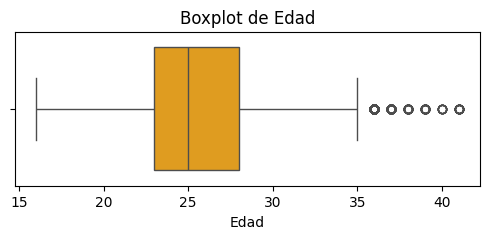

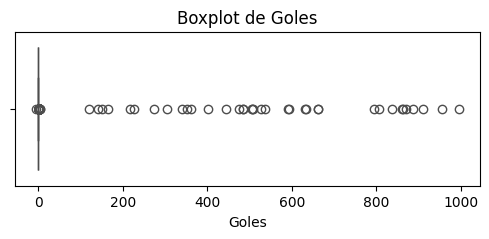

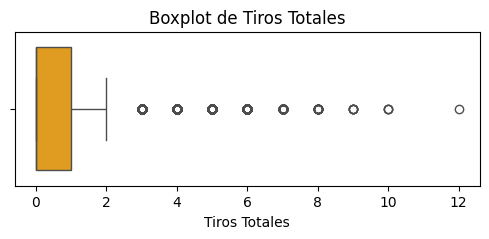

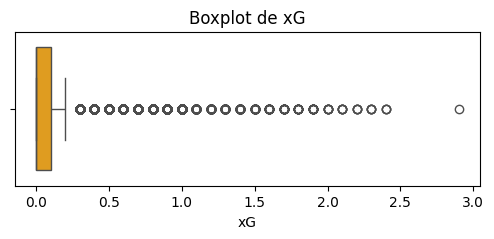

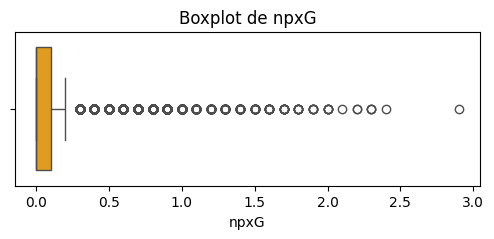

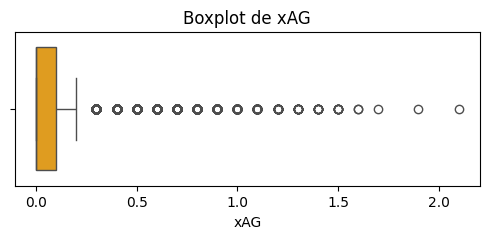

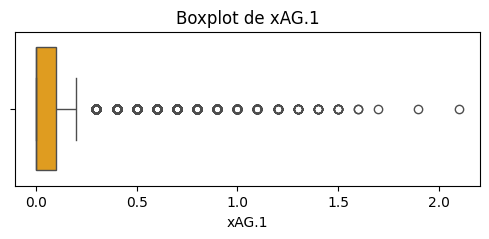

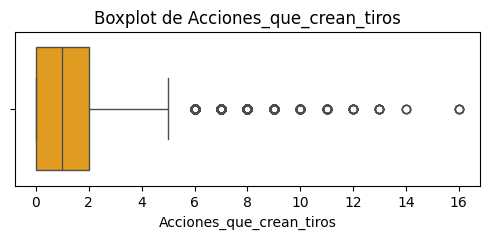

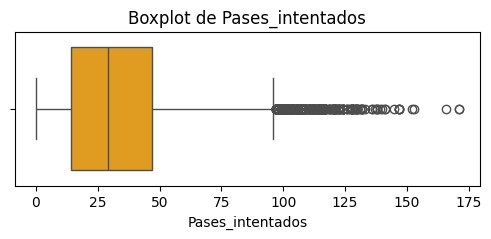

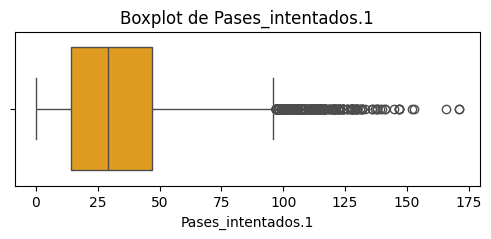

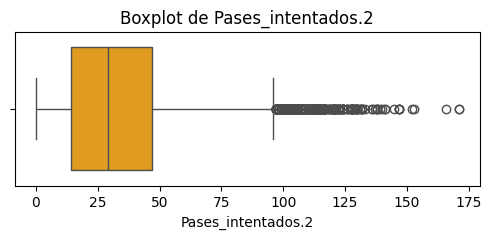

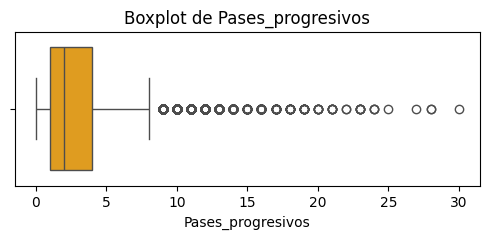

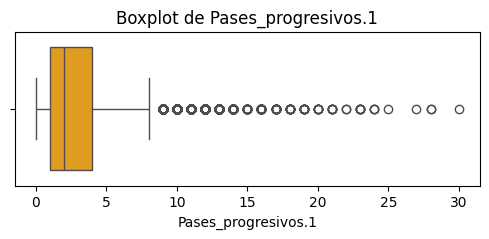

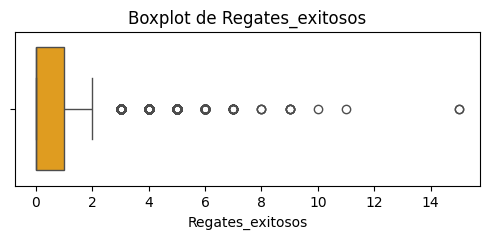

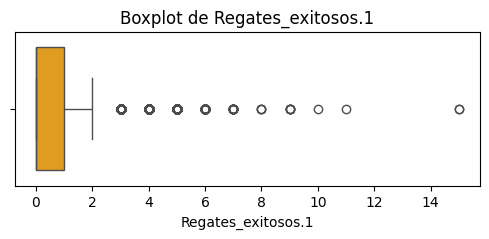

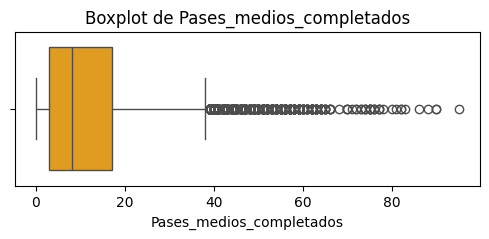

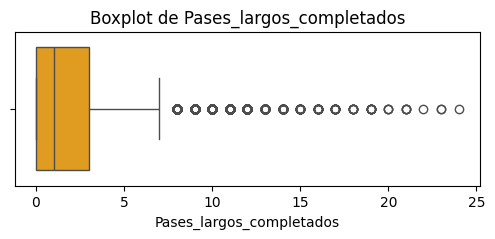

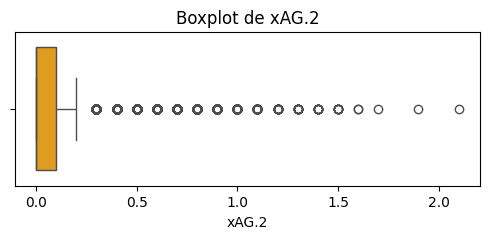

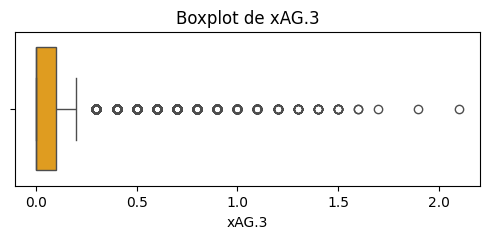

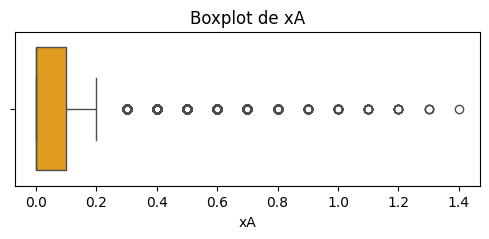

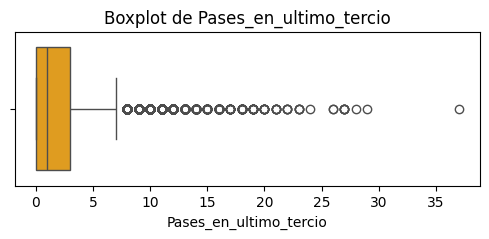

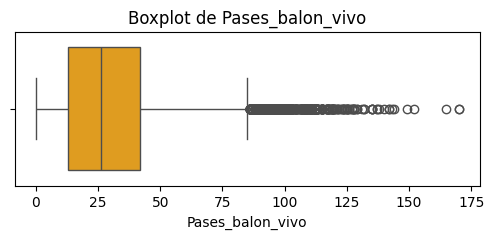

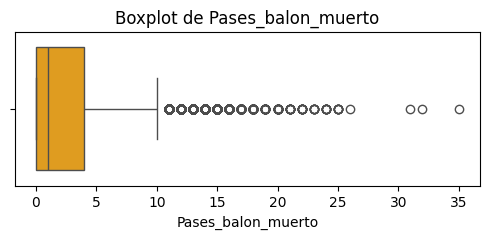

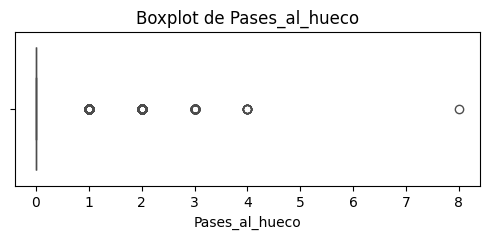

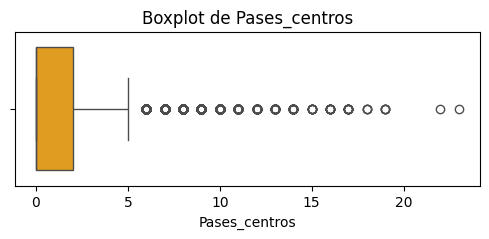

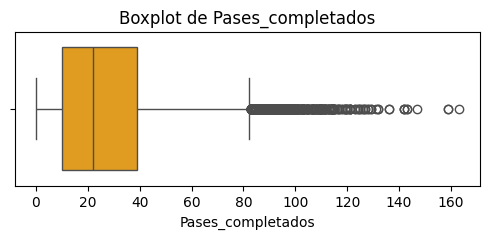

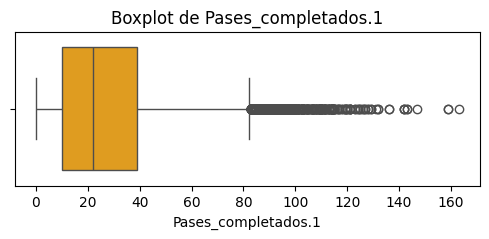

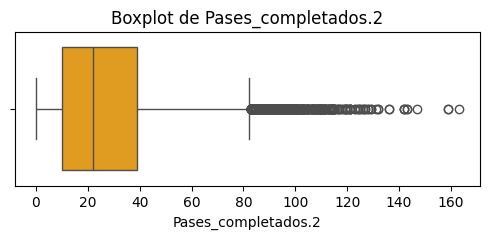

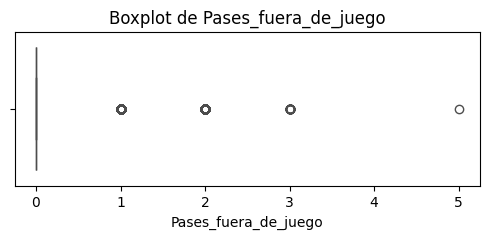

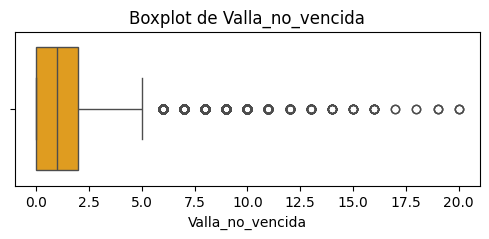

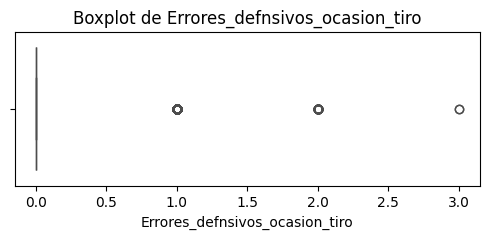

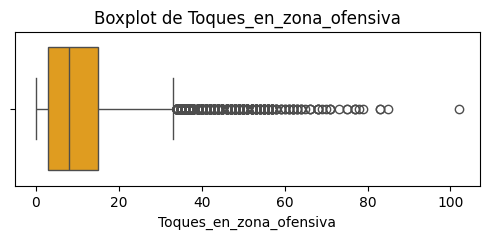

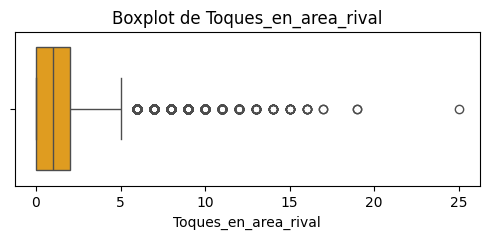

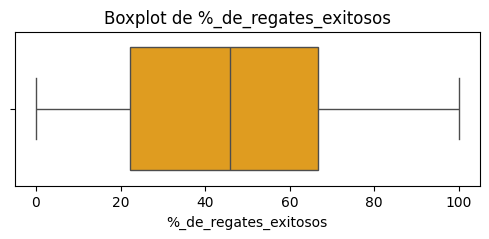

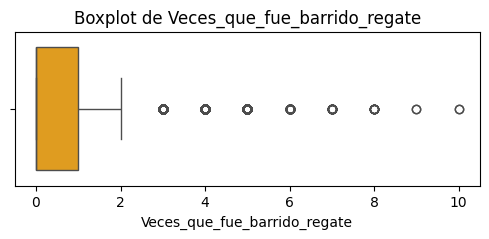

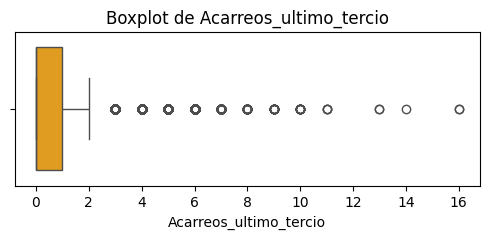

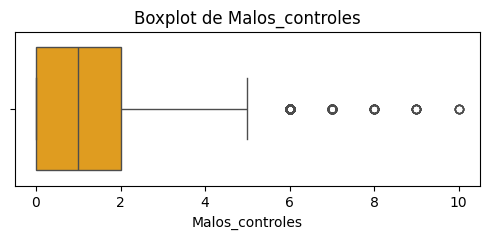

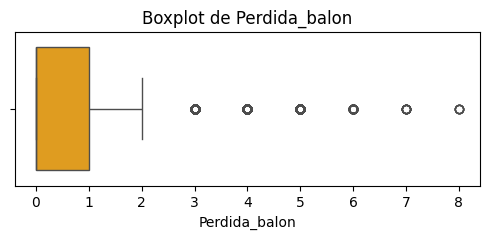

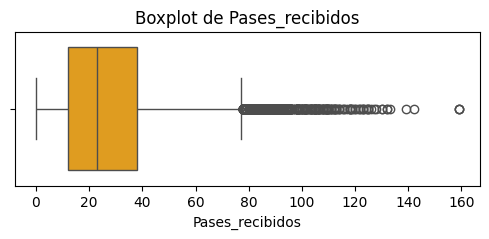

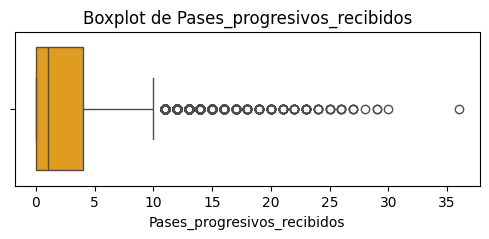

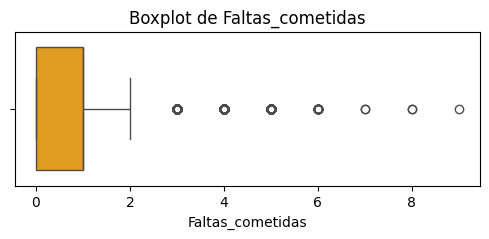

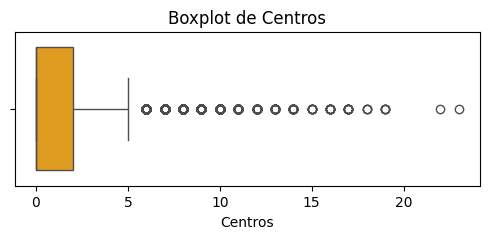

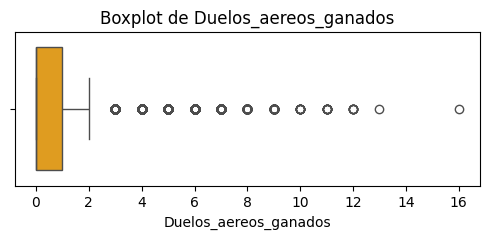

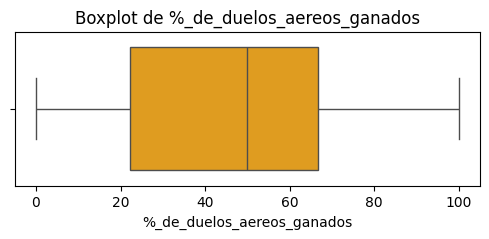

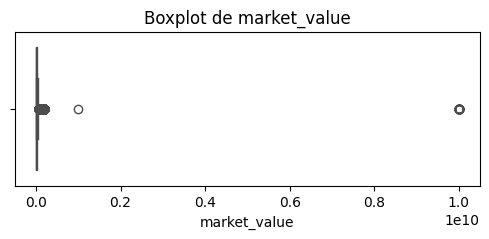

In [93]:
# Boxplots para detectar outliers
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=datos_entrenamiento[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.show()

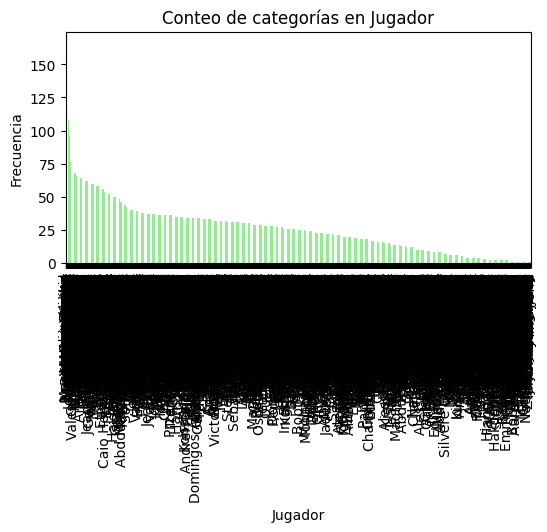

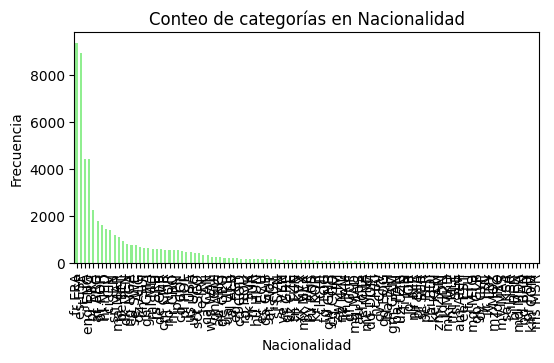

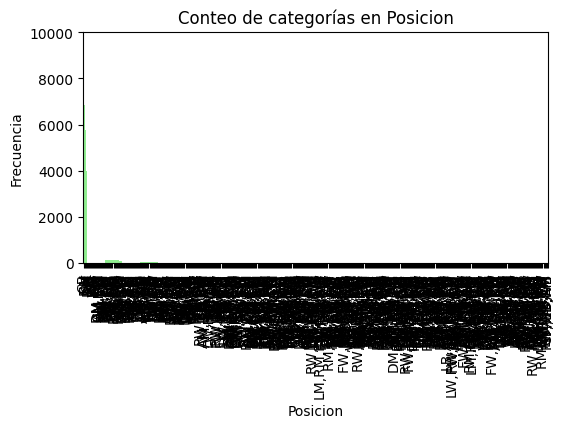

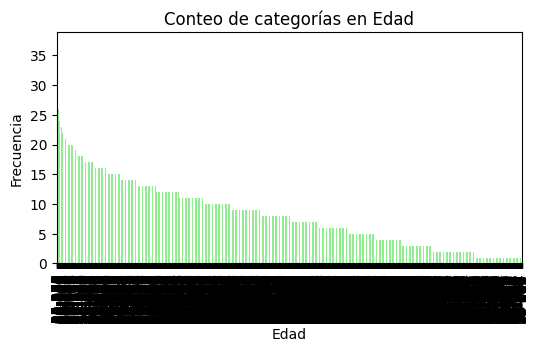

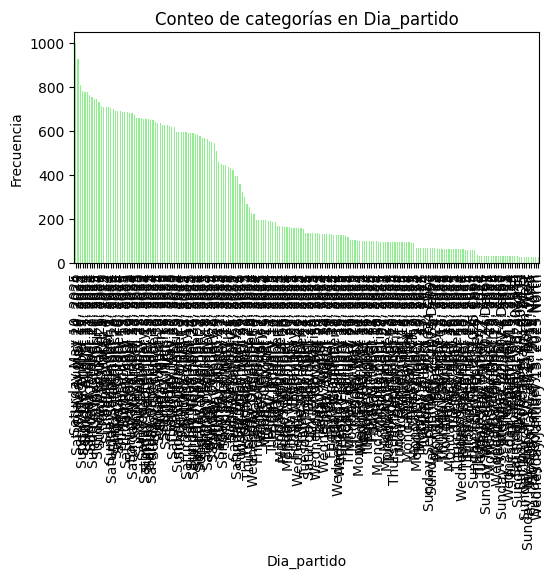

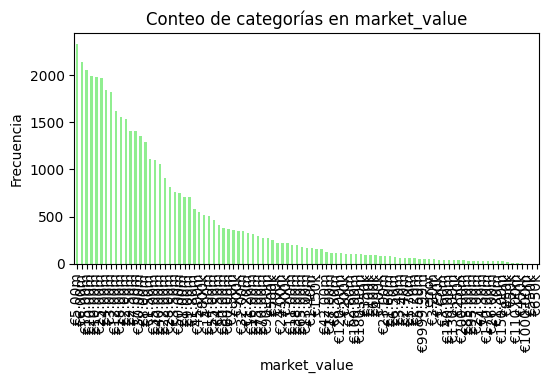

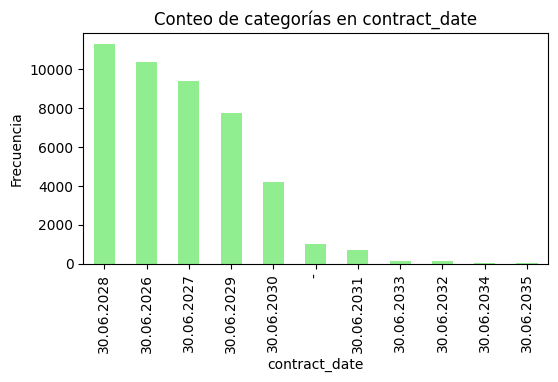

In [ ]:
# Visualización de variables categóricas
cat_cols = datos_entrenamiento.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6,3))
    datos_entrenamiento[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Conteo de categorías en {col}')
    plt.ylabel('Frecuencia')
    plt.show()

## **Selección preliminar de variables relevantes**

## **Modelado**

## **Evaluación Cuantitativa**

## **Evaluación Cualitativa**

## **Exportación del Mejor Modelo**

## **Generación de Predicciones con el Mejor Modelo**